# Telecom Churn Case Study

### Group Members :¶
**Sarika Srivastava**<br>
**Sidharth Kriplani**

### Business Goal: Retaining highly profitable customers 
How reduce customer churn? Predict. 

Asia has a lot of prepaid customers unlike Europe and US. 
Prepaid plans are where it is difficult to know whether the churn has occured or not 

How is churn defined?
Revenue-based churn: 
    1. Customers who have not utilized any revenue generating facility
    2. Shortcoming?
(I) Usage-based churn:
    1. Customers who have not used any facility 
FOR this assignment, Churn is defined as the Usage-based churn

In the SE Asian Market, 80% profit comes from the top 20% of customers 
(I) IN THIS Assignment, we have to predict churn only on high-value customers (HVC)

(I) WE have to predict the churn in September (9th month) from the features in the first 
three months (6-7-8)

Customer Behavior during Churn:
    1. HVCs switch over a period of time 
    2. Good-Action-Switch phase (I)
    3. Corrective actions can be taken in the Action phase and the churn is defined 
       on the last phase (Switch) (I)
NOTE: at the time of prediction the Churn phase data is not available 

(I)
6-7: Good
8: Action
9: Churn

### Steps:
    1. Derived Metrics
    2. Filter HVCs (those who have charged with more amt than that of the 70th 
       percentile of avg recharge amt in the good phase) = 29.9k rows
    3. Identify the best features
    4. Use Dimensionality reduction method
    5. Build a predictive model with high Recall
    

**Importing all libraries**

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt ,seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import sklearn

#Plot decision tree
from sklearn.tree import export_graphviz
#import pydot
#from IPython.display import Image

#PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

#XGBoost

import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
#import metric libraries
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_score,precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report,f1_score

In [3]:
#tel = pd.read_csv(r'telecom_churn_data.csv', encoding = 'palmos')
tel = pd.read_csv('telecom_churn_data.csv', encoding = 'palmos')
tel.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

# DATA UNDERSTANDING

In [4]:
tel.shape

(99999, 226)

In [5]:
tel.info(verbose =1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

**Lets categorise columns based on data type i.e. Date, Categorical and Numerical**

In [6]:
#Date columns
date_col = ['last_date_of_month_6',
            'last_date_of_month_7',
            'last_date_of_month_8',
            'last_date_of_month_9',
            'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
           'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']

#We can see in data there are few categorical columns which are integer in the dateset,like columns with less than equal to 3 categories
cat_col = [col for col in tel.columns if col not in date_col and tel[col].nunique() <= 3 ]

#Rest are numercial columns
num_col = [col for col in tel.columns if col not in cat_col+date_col]

## Data Cleaning

In [7]:
# taking stock of the kind of values the date type dataset has 
for i in date_col:
    print(tel[i].value_counts())

6/30/2014    99999
Name: last_date_of_month_6, dtype: int64
7/31/2014    99398
Name: last_date_of_month_7, dtype: int64
8/31/2014    98899
Name: last_date_of_month_8, dtype: int64
9/30/2014    98340
Name: last_date_of_month_9, dtype: int64
6/30/2014    16960
6/29/2014    12918
6/27/2014    11169
6/28/2014     9491
6/26/2014     5530
6/25/2014     4896
6/17/2014     4145
6/24/2014     4129
6/14/2014     3845
6/21/2014     3747
6/23/2014     2908
6/18/2014     2747
6/12/2014     2511
6/22/2014     2344
6/13/2014     2147
6/19/2014     2009
6/20/2014     1803
6/16/2014     1126
6/15/2014      873
6/11/2014      579
6/8/2014       520
6/5/2014       327
6/7/2014       322
6/10/2014      283
6/3/2014       233
6/1/2014       218
6/9/2014       199
6/6/2014       173
6/4/2014       131
6/2/2014       109
Name: date_of_last_rech_6, dtype: int64
7/31/2014    17288
7/30/2014    13863
7/25/2014     9401
7/29/2014     9052
7/28/2014     7502
7/27/2014     5909
7/26/2014     5382
7/24/2014     399

In [8]:
#check missing values in date column
tel[date_col].isnull().sum()

last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
date_of_last_rech_6          1607
date_of_last_rech_7          1767
date_of_last_rech_8          3622
date_of_last_rech_9          4760
date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
date_of_last_rech_data_9    74077
dtype: int64

**Since the date columns in dataset is small and all the columns contained in it have either just a single value in them or have a lot of null values, we drop all of them** 

In [9]:
#drop date columns
tel = tel.drop(date_col, axis = 1)

In [10]:
tel[cat_col].nunique()

circle_id           1
loc_og_t2o_mou      1
std_og_t2o_mou      1
loc_ic_t2o_mou      1
std_og_t2c_mou_6    1
std_og_t2c_mou_7    1
std_og_t2c_mou_8    1
std_og_t2c_mou_9    1
std_ic_t2o_mou_6    1
std_ic_t2o_mou_7    1
std_ic_t2o_mou_8    1
std_ic_t2o_mou_9    1
night_pck_user_6    2
night_pck_user_7    2
night_pck_user_8    2
night_pck_user_9    2
fb_user_6           2
fb_user_7           2
fb_user_8           2
fb_user_9           2
dtype: int64

In [11]:
#we will drop all columns which have only 1 value
tel.drop(columns =['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7',
                   'std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7',
                   'std_ic_t2o_mou_8','std_ic_t2o_mou_9'],axis =1,inplace = True)
#update cat_col
cat_col = [col for col in tel.columns if tel[col].nunique() <= 3 ]

In [12]:
# Missing Value Treatment 
nulsums = pd.DataFrame(round(100*(tel.isnull().sum()/len(tel.index)), 2)).reset_index()
nulsums['vals'] = nulsums.iloc[:, 1]
nulsums = nulsums[['index', 'vals']]

In [13]:
# remove all the columns with no missing values 
nulsums = nulsums[~(nulsums.vals==0)]
nulsums.sort_values(by = 'vals',ascending = False)

,index,vals
149,count_rech_3g_6,74.85
137,total_rech_data_6,74.85
145,count_rech_2g_6,74.85
141,max_rech_data_6,74.85
193,fb_user_6,74.85
153,av_rech_amt_data_6,74.85
173,night_pck_user_6,74.85
169,arpu_2g_6,74.85
165,arpu_3g_6,74.85
154,av_rech_amt_data_7,74.43


In [14]:
# missing values occur only in 3 ranges: less than 70 and above 70
nulsums00to70 = list(nulsums[nulsums.vals.between(0, 70, inclusive = False)]['index'])
nulsums70 = list(nulsums[nulsums.vals >= 70]['index'])

In [15]:
nulsums70

['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

**1. We can see above , there are some categorical variables which are important and we can impute -1.**<br>
**2. There are some recharge column which we will need later for segmenting the customers so we cannot drop them, also it makes sense to impute them with 0**<br>
**3. Rest of the columns we will drop**

In [16]:
#Impute -1 to categorcial variable
tel[cat_col] = tel[cat_col].apply(lambda x: x.fillna(-1))

In [17]:
#get the recharge data 
rech_col = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

#Impute NAN with 0
tel[rech_col] = tel[rech_col].apply(lambda x: x.fillna(0))

In [18]:
#We will drop rest of the columns
tel.drop(['arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9',
          'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9'], axis=1, inplace=True)

In [19]:
nulsums00to70

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'std_og_mou_9',


In [20]:
tel[nulsums00to70].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9
count,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000
mean,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,3.655123,1.123056,1.368500,1.433821,1.232726,144.201175,141.670476,141.328209,138.709970,79.829870,83.299598,83.282673,82.342919,87.299624,90.804137,89.838390,86.276622,1.129011,1.115010,1.067792,1.042362,168.261218,175.221436,174.191498,169.664466,0.798277,0.776572,0.791247,0.723892,3.916811,4.978279,5.053769,4.412767,0.454157,0.030235,0.033372,0.047456,47.922365,47.990520,47.211362,46.281794,107.475650,107.120493,108.460515,106.155471,12.084305,12.599697,11.751834,12.173105,167.491059,167.719540,167.432575,164.619293,9.575993,10.011904,9.883921,9.432479,20.722240,21.656415,21.183211,19.620913,2.156397,2.216923,2.085004,2.173419,32.457179,33.887833,33.154735,31.229344,0.061557,0.033585,0.040361,0.1

**From the description we can see that the columns are not normally distributed, so we will do the imputations with median**

In [21]:
#We will put a loop over the columns to impute the median
for i in nulsums00to70:
    tel[i] = tel[i].fillna(tel[i].median())

In [22]:
tel.isnull().sum().sum()

0

In [23]:
tel.shape

(99999, 194)

### SUBSETTING THE DATASET ACCORDING TO THE HVC CRITERIA

In [24]:
# since the provided dataset is not to be used completely, we have to sift for 
# HVCs through it. So we snip the dataset tel to include data about only HVCs

# we will have to consider the following columns for our analysis:
# 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 
# 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'

tel_sub = tel[['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
              'total_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 
              'av_rech_amt_data_8', 'av_rech_amt_data_9']]

In [25]:
# there are NaN values in some of the above columns. We will treat them too. 
# First we will create some derived metrics from them and then drop them 
tel['total_data_recharge_6'] = tel['total_rech_data_6']*tel['av_rech_amt_data_6']
tel['total_data_recharge_7'] = tel['total_rech_data_7']*tel['av_rech_amt_data_7']
tel['total_data_recharge_8'] = tel['total_rech_data_8']*tel['av_rech_amt_data_8']
tel['total_data_recharge_9'] = tel['total_rech_data_9']*tel['av_rech_amt_data_9']

In [26]:
# now we drop the columns 
tel = tel.drop(tel_sub, axis = 1)

In [27]:
# average total of both total recharge amount (includes calls and sms) and total 
# recharge amount for data. For just the good phase now
tel['avg_recharge_amt_6_7'] = (tel['total_rech_amt_6']+tel['total_data_recharge_6']+
                               tel['total_rech_amt_7']+tel['total_data_recharge_7'])/2
tel['avg_recharge_amt_8'] = (tel['total_rech_amt_8']+tel['total_data_recharge_8'])/2
tel['avg_recharge_amt_9'] = (tel['total_rech_amt_9']+tel['total_data_recharge_9'])/2

In [28]:
# now we drop the above used columns 
tel = tel.drop(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9'
                , 'total_data_recharge_6', 'total_data_recharge_7', 'total_data_recharge_8', 
                'total_data_recharge_9'], axis = 1)

In [29]:
# now we filter the data on the basis of what we have to select our HVCs
tel = tel[tel['avg_recharge_amt_6_7']>=np.percentile(tel['avg_recharge_amt_6_7'], 70)]

### Create the Target Variable - Churn
Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase

In [30]:
# create the Target variable
tel['churn'] = tel.apply(lambda x: 1 
                                  if ((x['total_ic_mou_9'] == 0) & (x['total_og_mou_9'] == 0)& 
                                      (x['vol_2g_mb_9'] == 0)& (x['vol_3g_mb_9'] == 0)) else 0, axis=1)

**We will drop all variables for 9th month or the churn phase because, at the time of prediction , this data will not be available to us for prediction. Thus, after tagging churn as 1/0 based on this phase, we will discard all data corresponding to this phase.**

In [31]:
churn_col = [i for i in tel.columns if i[-1] == "9"]

In [32]:
tel.drop(columns = churn_col,axis =1,inplace = True)

In [33]:
tel.shape

(30001, 141)

### Feature Engineering

**Data Type correction**

In [34]:
cat_col

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [35]:
cat_col.remove('night_pck_user_9')
cat_col.remove('fb_user_9')
cat_col

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [36]:
#change data type to category
tel[cat_col] = tel[cat_col].astype("category")

**We will create few variables out of month 6 and 7 which belongs to Good phase**

In [37]:
good_phase = [i for i in tel.columns if i[-1] == "6" or i[-1] == "7"]
good_phase

['arpu_6',
 'arpu_7',
 'onnet_mou_6',
 'onnet_mou_7',
 'offnet_mou_6',
 'offnet_mou_7',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_mou_6',
 'std_og_mou_7',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'og_others_6',
 'og_others_7',
 'total_og_mou_6',
 'total_og_mou_7',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'total_ic_mou_6',
 

In [38]:
#Calculating average and storing in derived column for good phase

tel['avg_arpu_6_7'] = (tel['arpu_6'] + tel['arpu_7'])/2
tel['avg_total_rech_num_6_7'] = (tel['total_rech_num_6'] + tel['total_rech_num_7'])/2
tel['avg_max_rech_amt_6_7'] = (tel['max_rech_amt_6'] + tel['max_rech_amt_7'])/2
tel['avg_vol_2g_mb_6_7'] = (tel['vol_2g_mb_6'] + tel['vol_2g_mb_7'])/2
tel['vol_3g_mb_6_7_avg'] = (tel['vol_3g_mb_6'] + tel['vol_3g_mb_7'])/2
tel['max_rech_data_6_7_avg'] = (tel['max_rech_data_6'] + tel['max_rech_data_7'])/2

original_col=['arpu_6','arpu_7','total_rech_num_6','total_rech_num_7',
              'vol_2g_mb_6','vol_2g_mb_7','vol_3g_mb_6',
              'vol_3g_mb_7','max_rech_amt_6','max_rech_amt_7','max_rech_data_6','max_rech_data_7']

In [39]:
#Drop original columns

tel.drop(columns =original_col,axis =1,inplace = True)

In [40]:
# before we go ahead, there are still a lot of variables that belong to the 6th or the 7th month and have not been aggregated together to form the good phae metrics 
drop_list = ['onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6', 'isd_og_mou_7', 'og_others_6', 'og_others_7', 'spl_og_mou_6', 'spl_og_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_mou_6', 'std_ic_mou_7', 'spl_ic_mou_6', 'spl_ic_mou_7', 'isd_ic_mou_6', 'isd_ic_mou_7', 'ic_others_6', 'ic_others_7', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'jul_vbc_3g', 'jun_vbc_3g']

tel['onnet_mou_6_7']=(tel['onnet_mou_6']+tel['onnet_mou_7'])/2 
tel['offnet_mou_6_7']=(tel['offnet_mou_6']+tel['offnet_mou_7'])/2
tel['roam_ic_mou_6_7']=(tel['roam_ic_mou_6']+tel['roam_ic_mou_7'])/2 
tel['roam_og_mou_6_7']=(tel['roam_og_mou_6']+tel['roam_og_mou_7'])/2
tel['loc_og_mou_6_7']=(tel['loc_og_mou_6']+tel['loc_og_mou_7'])/2 
tel['std_og_t2f_mou_6_7']=(tel['std_og_t2f_mou_6']+tel['std_og_t2f_mou_7'])/2
tel['std_og_mou_6_7']=(tel['std_og_mou_6']+tel['std_og_mou_7'])/2
tel['isd_og_mou_6_7']=(tel['isd_og_mou_6']+tel['isd_og_mou_7'])/2
tel['og_others_6_7']=(tel['og_others_6']+tel['og_others_7'])/2
tel['spl_og_mou_6_7']=(tel['spl_og_mou_6']+tel['spl_og_mou_7'])/2
tel['loc_ic_mou_6_7']=(tel['loc_ic_mou_6']+tel['loc_ic_mou_7'])/2
tel['std_ic_t2t_mou_6_7']=(tel['std_ic_t2t_mou_6']+tel['std_ic_t2t_mou_7'])/2 
tel['std_ic_t2f_mou_6_7']=(tel['std_ic_t2f_mou_6']+tel['std_ic_t2f_mou_7'])/2 
tel['std_ic_mou_6_7']=(tel['std_ic_mou_6']+tel['std_ic_mou_7'])/2
tel['spl_ic_mou_6_7']=(tel['spl_ic_mou_6']+tel['spl_ic_mou_7'])/2
tel['isd_ic_mou_6_7']=(tel['isd_ic_mou_6']+tel['isd_ic_mou_7'])/2 
tel['ic_others_6_7']=(tel['ic_others_6']+tel['ic_others_7'])/2
tel['last_day_rech_amt_6_7']=(tel['last_day_rch_amt_6']+tel['last_day_rch_amt_7'])/2
tel['vbc_6_7']=(tel['jul_vbc_3g']+tel['jun_vbc_3g'])/2

tel = tel.drop(drop_list, axis = 1)

In [41]:
tel.shape

(30001, 116)

### Correlation

In [42]:
corr = tel.corr()

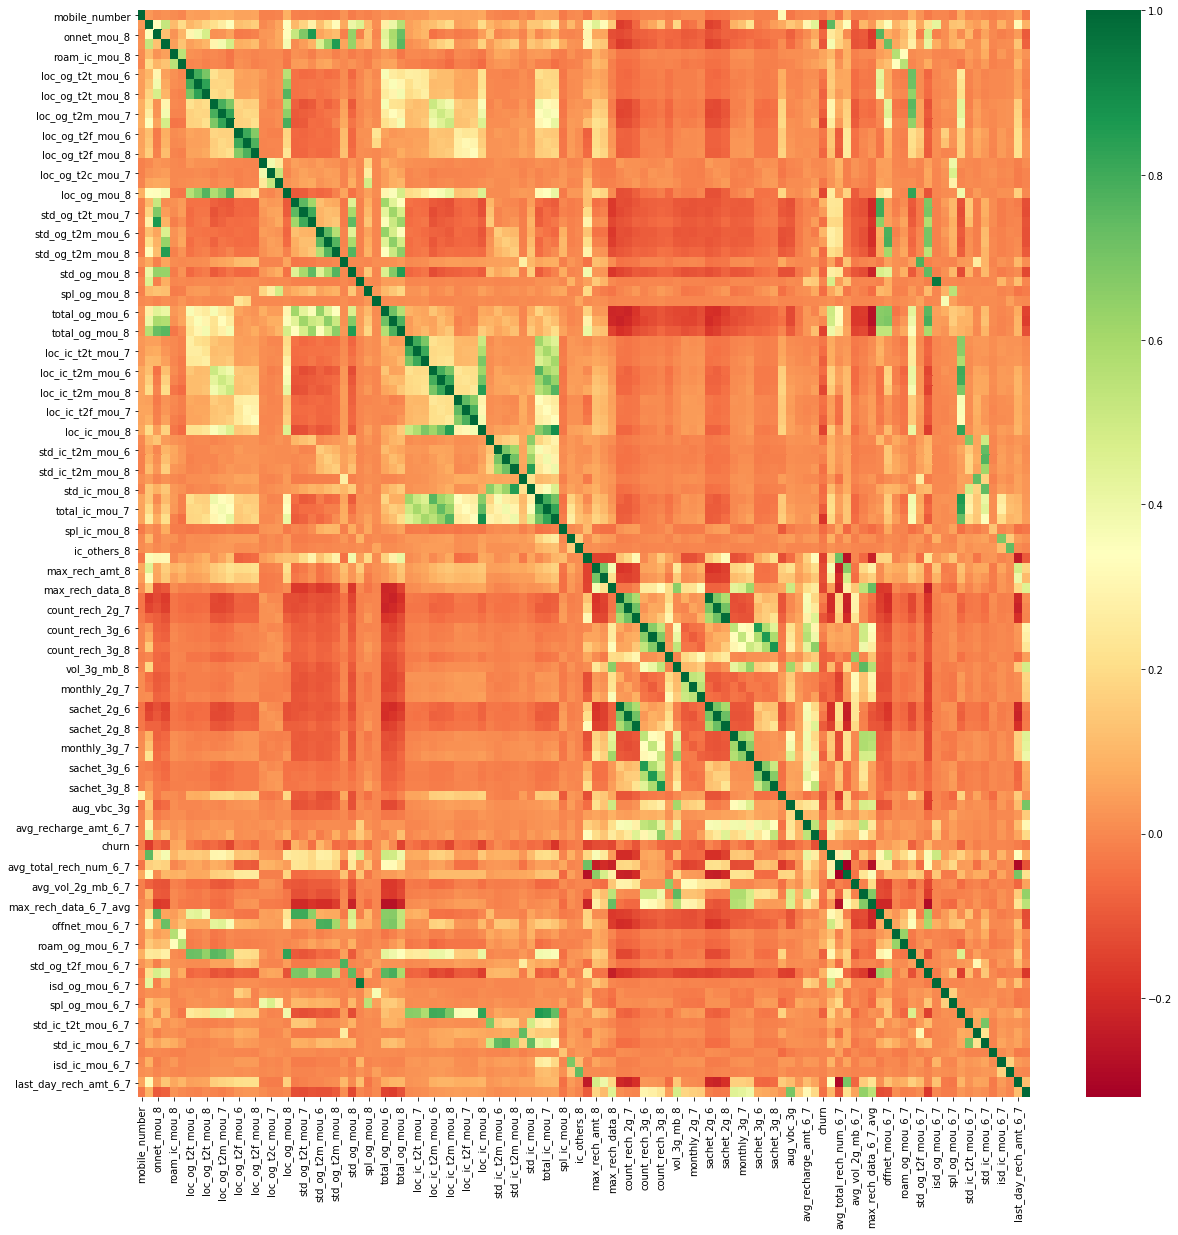

In [43]:
# here we plot a heatmap to check for multicollinearity
plt.figure(figsize = (20, 20))
sns.heatmap(corr, cmap = 'RdYlGn')

In [44]:
# too many features uncorrelated with the target variable are observed above, but we will let it be till PCA where they will get handled automatically
corr['churn'].sort_values(ascending = False)[:5]

tel.shape

(30001, 116)

In [45]:
corr['churn'].sort_values(ascending = False)[-5:]

total_og_mou_8     -0.145441
loc_ic_mou_8       -0.147531
total_rech_num_8   -0.151901
arpu_8             -0.160911
total_ic_mou_8     -0.178381
Name: churn, dtype: float64

In [46]:
tel.shape

(30001, 116)

In [47]:
# lets drop some id columns which will not add any value to the model
tel = tel.drop(['mobile_number'], axis = 1)
tel.shape

(30001, 115)

### Data Visualization

In [48]:
### Now we shall begin with data exploration using visualization 
tel.columns

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
       ...
       'spl_og_mou_6_7', 'loc_ic_mou_6_7', 'std_ic_t2t_mou_6_7',
       'std_ic_t2f_mou_6_7', 'std_ic_mou_6_7', 'spl_ic_mou_6_7',
       'isd_ic_mou_6_7', 'ic_others_6_7', 'last_day_rech_amt_6_7', 'vbc_6_7'],
      dtype='object', length=115)

Text(0.5, 1.0, 'Churn Distribution')

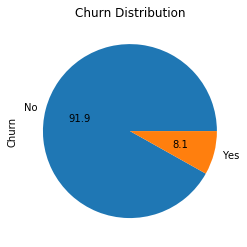

In [49]:
# Let's first plot the distribution of the churn 
plt.pie( (tel['churn'].value_counts()*100.0 /len(tel)), autopct='%.1f', labels = ['No', 'Yes'])
plt.ylabel('Churn')
plt.title('Churn Distribution')

### Only 8% have churned and the rest 92% of customers have not churned. This is a highly imbalanced data.

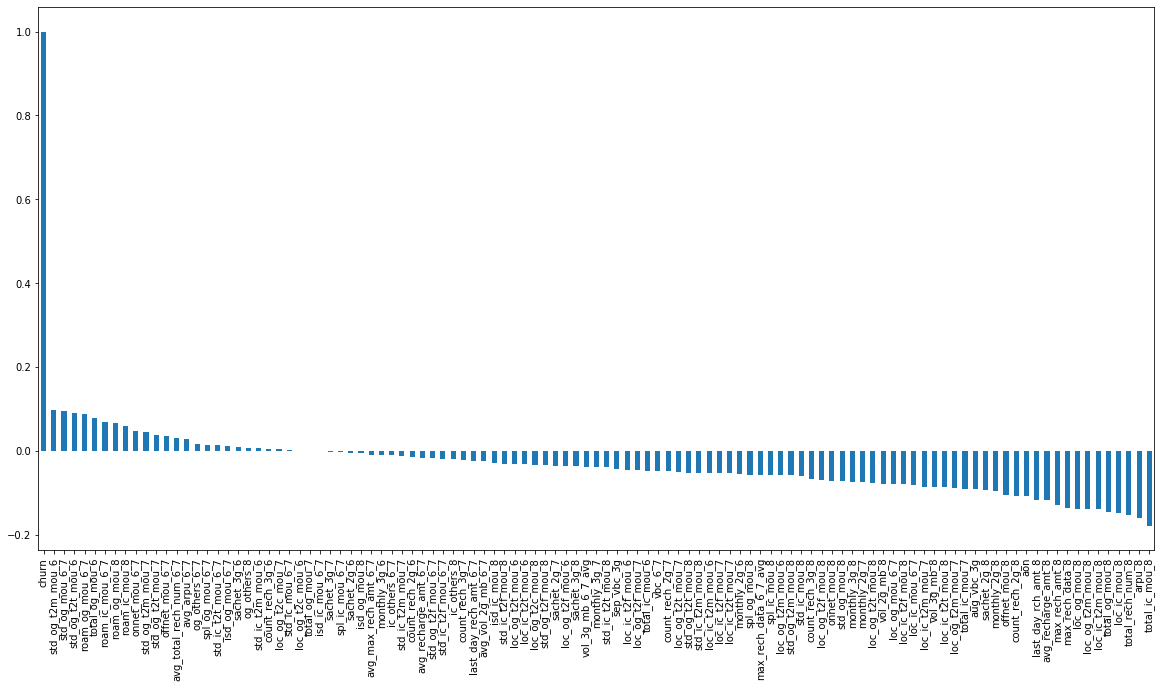

In [50]:
# Let's plot the correlation between target variable and every other variable 
plt.figure(figsize=(20,10))
tel.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

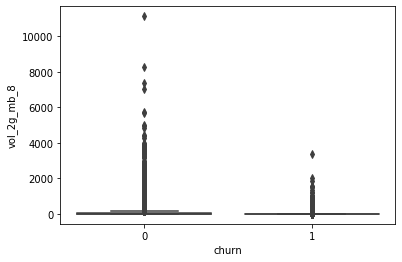

In [51]:
# Boxplotting for vol_2g_mb against churn because network availability issues can always crop up anywhere
sns.boxplot(x = tel.churn, y = tel.vol_2g_mb_8)

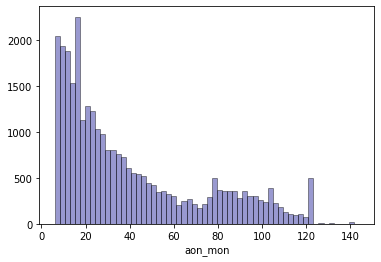

In [52]:
# Let's convert aon to months and plot a distplot of it 
tel['aon_mon'] = tel['aon']/30
tel.drop(['aon'], axis = 1, inplace = True)
ax = sns.distplot(tel.aon_mon, hist = True, kde = False, bins = int(300/5), color = 'darkblue', hist_kws={'edgecolor':'black'})

**From the below plot we can infer that the lesser the time period a customer spends with a telecom operator, the more likely is he to churn.**

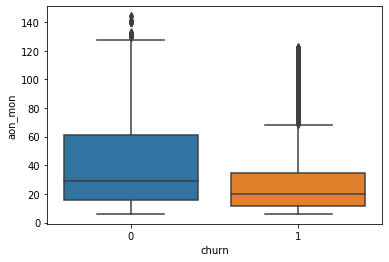

In [53]:
sns.boxplot(x = tel.churn, y = tel.aon_mon)

Text(0.5, 1.0, 'Distribution of Max Recharge Amount by churn')

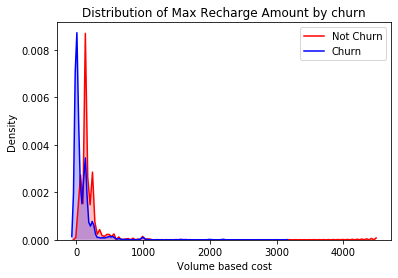

In [54]:
ax = sns.kdeplot(tel.max_rech_amt_8[(tel["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(tel.max_rech_amt_8[(tel["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')



**Thus people who recharge with less amount are more likely to churn.**

## Dummy Variables

In [55]:
#Create dummies for categoric columns
dummies = pd.get_dummies(tel[cat_col])

In [56]:
#We will drop column for -1 value as those are missing values.
category_neg1 = [x+'_-1.0' for x in cat_col]
category_neg1

['night_pck_user_6_-1.0',
 'night_pck_user_7_-1.0',
 'night_pck_user_8_-1.0',
 'fb_user_6_-1.0',
 'fb_user_7_-1.0',
 'fb_user_8_-1.0']

In [57]:
dummies.head()

,night_pck_user_6_-1.0,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_-1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_-1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_-1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_-1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_-1.0,fb_user_8_0.0,fb_user_8_1.0
0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
7,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
8,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1
21,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
23,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1


In [58]:
#Dropping one of the dummy column where name has -1 appended as suffix
dummies.drop(category_neg1, axis = 1, inplace = True)

In [59]:
#Concat original dataset with dummy columns
tel = pd.concat([tel, dummies], axis = 1)

In [60]:
#Dropping original columns
tel.drop(cat_col, axis = 1, inplace = True)

In [61]:
tel.shape

(30001, 121)

### Normalization - SMOTE

**Having completed our data exploration through visualization, we will now proceed to standardize the data and reduce its dimensionality**

**Function for GridSearch CV**

In [62]:
#the function will take the data and the estimator and return the model with best hyperparameter
def model_score(name,est,param,X_train,y_train,X_test,y_test,CV):
    grid = GridSearchCV(estimator= est,param_grid = param,cv = CV,verbose = 5,n_jobs = 3,scoring='f1')
    grid.fit(X_train,y_train)
    print("Model Name ",name,"\n")
    print("Best Score of ",grid.best_score_,"for Best parameters are \n",grid.best_params_, )
    
    model = grid.best_estimator_
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    f1 = f1_score(y_test,pred,average = 'weighted')
    print("\n F1 score for ",name," : ",f1)
    
    return(model)

# we will use K- fold cross validation
CV = KFold(n_splits=5)

**We will use MinMaxScaler**

In [63]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()


y = tel.churn
X = tel.drop(['churn'], axis = 1)

x = scaler.fit_transform(X)

**We will split the data and treat the imbalance data using SMOTE**

In [64]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.7, random_state = 100)
                                                   
# now we check for class imbalances
y_train_imbalance = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imbalance = (y_test != 0).sum()/(y_test == 0).sum()
print(y_train_imbalance, y_test_imbalance)

# there is a class imbalance of 8% in both train and test set. We resolve that by using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train, y_train = sm.fit_sample(X_train, y_train)

imbalance = (y_train != 0).sum()/(y_train == 0).sum()
print(imbalance)        

0.08958837772397095 0.08813471502590674


Using TensorFlow backend.
C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

1.0


## As one of the problem statement asks us to build a model with the main objective of identifying important predictor attributes which help the business understand indicators of churn

### We will use Random Forest for this purpose before we use PCA

In [158]:
param_grid  = {'n_estimators':[15,20], 
            'min_samples_split':[8,16],
            'min_samples_leaf':[1,2,3]}

In [159]:
rfc = RandomForestClassifier(random_state = 1234)
model_random = model_score("Random Forest",rfc,param_grid,X_train,y_train,X_test,y_test,CV)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   30.9s
[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:  2.2min finished


Model Name  Random Forest 

Best Score of  0.8545000959117415 for Best parameters are 
 {'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 20}

 F1 score for  Random Forest  :  0.9317893468008208


In [67]:
#Using SelectFromModel to get importance indices for eact feature
sel = SelectFromModel(RandomForestClassifier(n_estimators=20,  min_samples_leaf = 1, min_samples_split = 8))
#Fit SelectFromModel|
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=8,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=20, n_jobs=None,
                                                 oob_score=False,


In [68]:
sel.get_support()

array([ True,  True,  True,  True,  True, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True,  True, False, False, False,
        True, False,  True, False, False,  True, False, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True])

In [69]:
#Print total important features as per SelectFromModel
selected_feat= X.columns[(sel.get_support())]
len(selected_feat)

26

In [70]:
#List feature names which are important
print(selected_feat)

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'std_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_8',
       'total_rech_num_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'max_rech_data_8', 'avg_recharge_amt_8', 'roam_ic_mou_6_7',
       'roam_og_mou_6_7', 'std_ic_t2t_mou_6_7', 'spl_ic_mou_6_7',
       'night_pck_user_8_0.0', 'fb_user_8_1.0'],
      dtype='object')


In [71]:
#Assigning feature importance score to plot bars and y-axis
importances = sel.estimator_.feature_importances_

In [72]:
imp_df = pd.DataFrame({
    "Varname": X.columns,
    "Imp": importances
})
top10 = imp_df.sort_values(by="Imp", ascending=False)[0:10]
top10

,Varname,Imp
81,avg_recharge_amt_8,0.069581
0,arpu_8,0.062588
4,roam_og_mou_8,0.055799
50,total_ic_mou_8,0.053765
56,last_day_rch_amt_8,0.044843
54,total_rech_num_8,0.038377
37,loc_ic_t2m_mou_8,0.034481
3,roam_ic_mou_8,0.032736
55,max_rech_amt_8,0.030463
10,loc_og_t2m_mou_8,0.027090


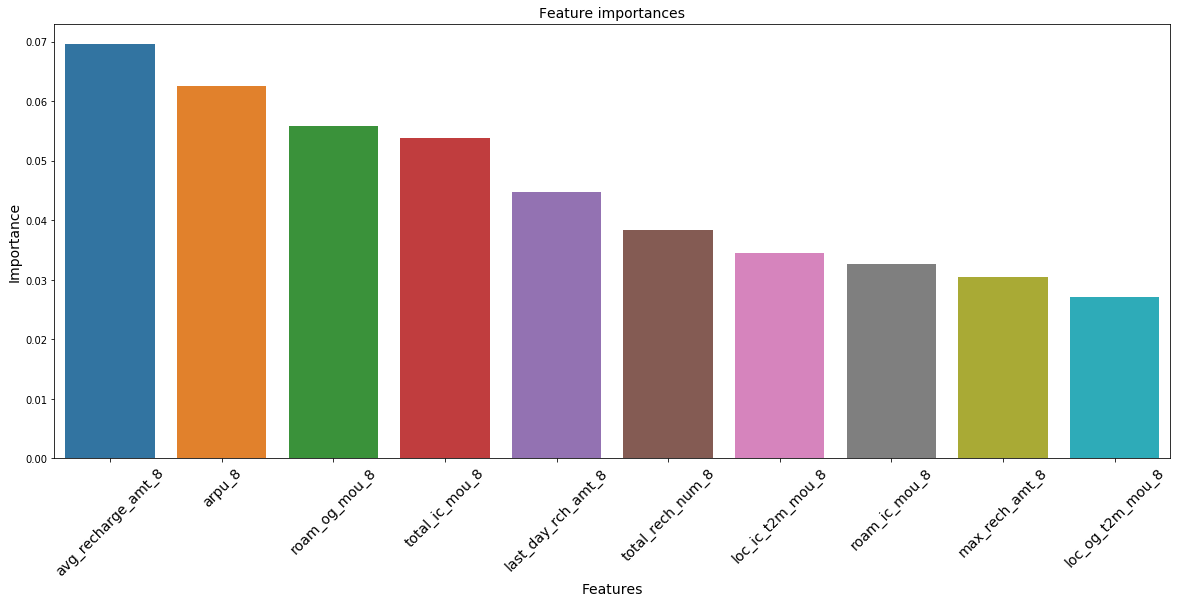

In [73]:
plt.figure(figsize=(20,8))
plt.title("Feature importances",fontsize = 14)
sns.barplot(x = 'Varname',y='Imp',data = top10)
plt.xticks(fontsize = 14,rotation =45)
plt.xlabel("Features",fontsize = 14)
plt.ylabel("Importance",fontsize = 14)
plt.show()

In [74]:
print("As per above model, top 10 important features are: ")
for i in top10['Varname']:
    print(i)

As per above model, top 10 important features are: 
avg_recharge_amt_8
arpu_8
roam_og_mou_8
total_ic_mou_8
last_day_rch_amt_8
total_rech_num_8
loc_ic_t2m_mou_8
roam_ic_mou_8
max_rech_amt_8
loc_og_t2m_mou_8


### Observation
**All the important features are from month 8th i.e. the action phase**<br>
**We can visually look at some of the features below**

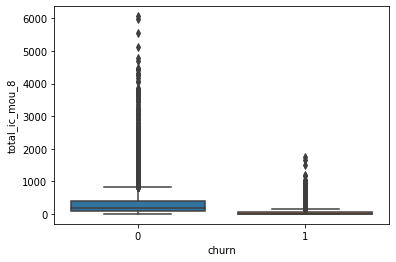

In [75]:
sns.boxplot(y = tel['total_ic_mou_8'],x = tel['churn'])

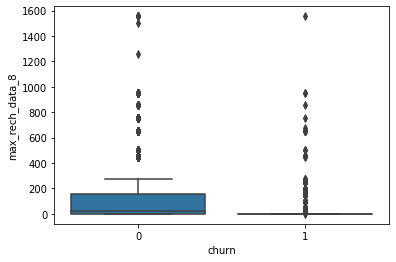

In [76]:
sns.boxplot(y = tel['max_rech_data_8'],x = tel['churn'])

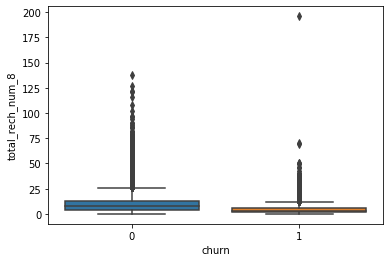

In [77]:
sns.boxplot(y = tel['total_rech_num_8'],x = tel['churn'])

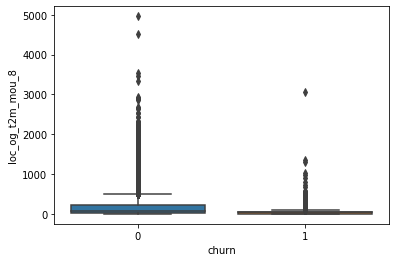

In [78]:
sns.boxplot(y = tel['loc_og_t2m_mou_8'],x = tel['churn'])

## We need to build a model amongst various classification models for prediction with highest Recall

### Now we will use PCA for dimension reduction

In [79]:
pca = PCA(random_state = 100)
pca.fit(X_train)

X_train_PCA = pca.fit_transform(X_train) 
X_test_PCA = pca.fit_transform(X_test)

<BarContainer object of 120 artists>

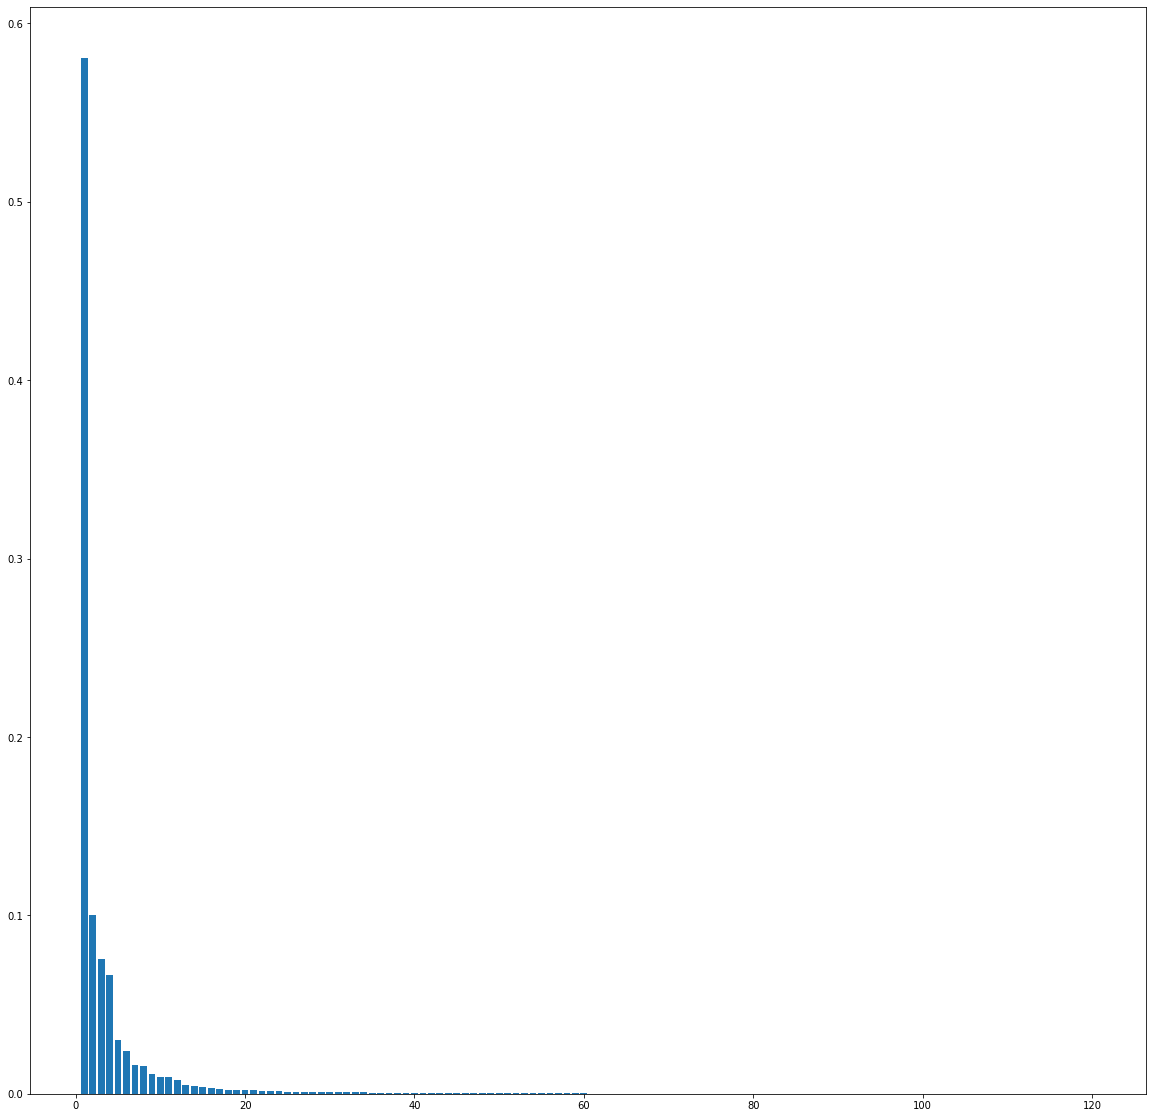

In [80]:
# Now we will draw a bar plot to visualize the PCs obtained above 
plt.figure(figsize = (20, 20))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

### Scree Plot

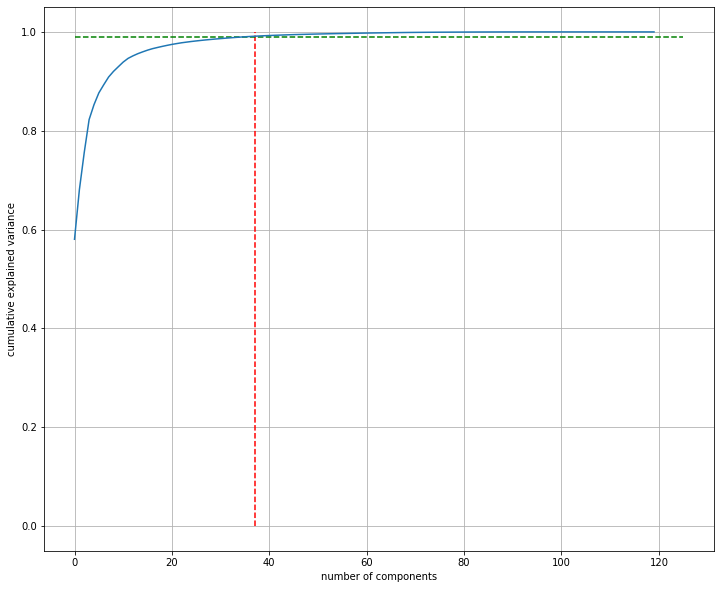

In [81]:
%matplotlib inline
fig = plt.figure(figsize = (12,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=37, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=.99, xmax=125, xmin=0, colors="g", linestyles="--")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [82]:
# the above scree plot shows that around 99% of the data is explained by the first 37 Principal Components, and after that 90%, the 
# explanation starts to taper off. So let's do PCA again
pc2 = PCA(n_components = 37, random_state = 100)

In [83]:
# now we transform our data, to achieve the dimensionality reduction 
data_train = pc2.fit_transform(X_train)
data_train.shape

(16520, 37)

In [84]:
# Let's see correlation between PCA components.
# Expected to be not correlated
corrmat = np.corrcoef(data_train.transpose())

Plotting the heatmap of the corr matrix We can clearly see, there is no correlation between PCA components

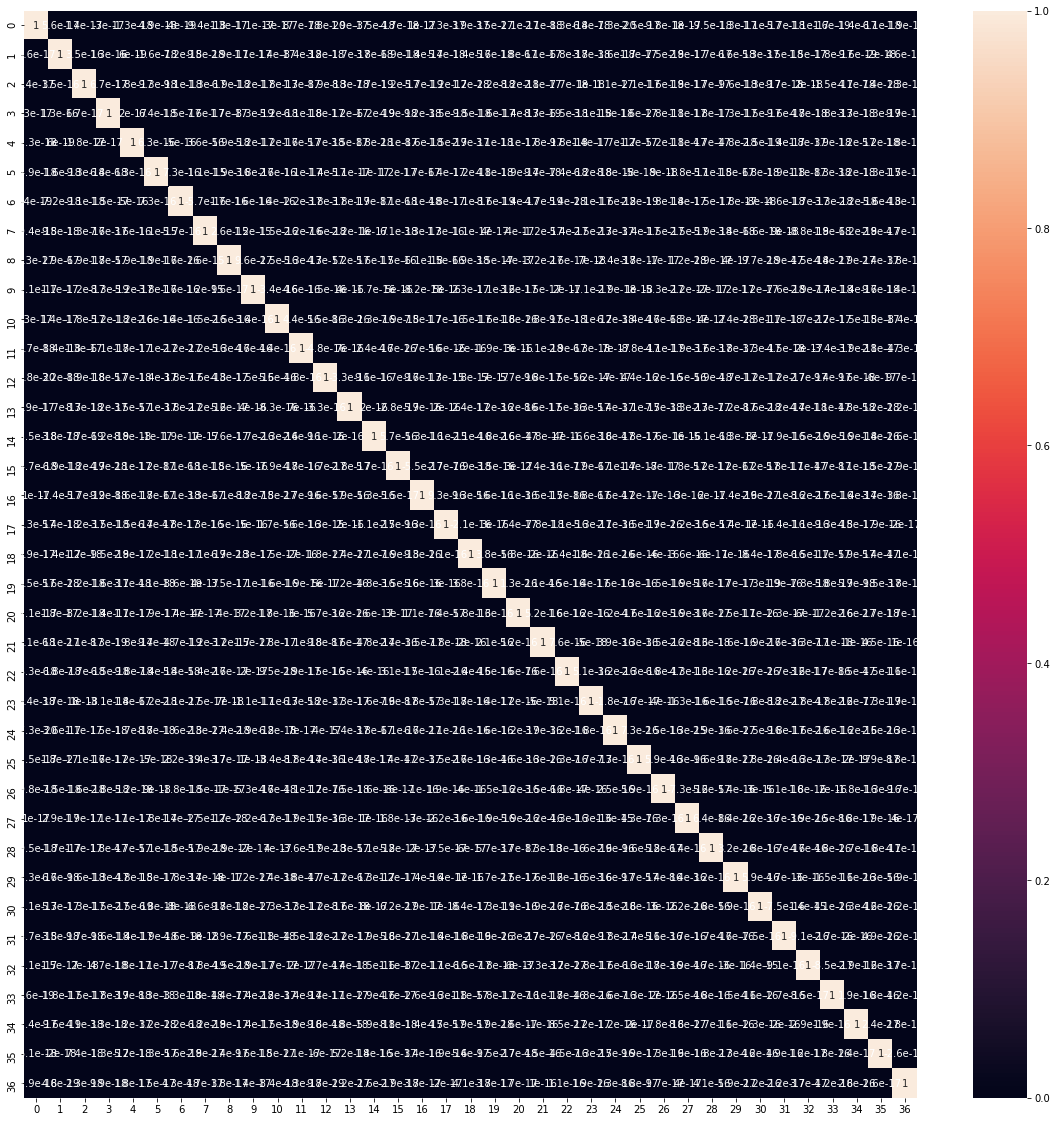

In [85]:
plt.figure(figsize=[20,20])
sns.heatmap(corrmat, annot=True)
plt.show()

In [86]:
y.shape

(30001,)

In [87]:
# applying PCA to the test data now 
data_test = pc2.transform(X_test)

**We have got final datasets with reduced variables for building a model**

# Modelling with PCA
### We will build model to predict whether a high-value customer will churn or not, in near future

In [88]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold

In [89]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report,f1_score

## 1 . Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
dtc_param = {'max_depth':[5,10,15],'min_samples_leaf':[20,50,100]}

In [92]:
dec = DecisionTreeClassifier()

In [93]:
model_Decision = model_score("Decision Tree",dec,dtc_param,data_train,y_train,data_test,y_test,CV)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    7.0s
[Parallel(n_jobs=3)]: Done  45 out of  45 | elapsed:   34.4s finished


Model Name  Decision Tree 

Best Score of  0.6710392468589281 for Best parameters are 
 {'max_depth': 15, 'min_samples_leaf': 20}

 F1 score for  Decision Tree  :  0.8527867611883422


**Classification Report**

In [94]:
print(classification_report(y_test,model_Decision.predict(data_test)))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90     19300
           1       0.25      0.58      0.35      1701

    accuracy                           0.82     21001
   macro avg       0.60      0.71      0.62     21001
weighted avg       0.90      0.82      0.85     21001



### F1 score

In [95]:
f1_score(y_train,model_Decision.predict(data_train),average = 'weighted')

0.9065283183991951

In [96]:
f1_score(y_test,model_Decision.predict(data_test),average = 'weighted')

0.8527867611883422

In [97]:
#print confusion matirx
confusion_dt = metrics.confusion_matrix( y_test,model_Decision.predict(data_test) )
confusion_dt

array([[16294,  3006],
       [  717,   984]], dtype=int64)

**ROC-AUC**

In [98]:
#ROC-AUC
print("Performance for train : ", roc_auc_score(y_train, model_Decision.predict(data_train)))

Performance for train :  0.9065375302663438


In [99]:
#ROC-AUC
print("Performance for test : ", roc_auc_score(y_test, model_Decision.predict(data_test)))

Performance for test :  0.7113659749065622


## 2. Logistics Regression

In [100]:
from sklearn.linear_model import LogisticRegression 

In [101]:
lrc_param = {'C':[0.1, 0.5, 5, 10], 
            'penalty':['l2'],
            'solver':['liblinear','lbfgs']
            }
lrc = LogisticRegression(random_state=1234)

In [102]:
model_log = model_score("Logistics Regression",lrc,lrc_param,data_train,y_train,data_test,y_test,CV)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    2.4s
[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:   10.9s finished


Model Name  Logistics Regression 

Best Score of  0.6562282554218426 for Best parameters are 
 {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

 F1 score for  Logistics Regression  :  0.8585267540985083


In [103]:
print(classification_report(y_test,model_log.predict(data_test)))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90     19300
           1       0.29      0.80      0.43      1701

    accuracy                           0.82     21001
   macro avg       0.63      0.81      0.66     21001
weighted avg       0.92      0.82      0.86     21001



### F1 score

In [104]:
f1_score(y_test,model_log.predict(data_test),average = 'weighted')

0.8585267540985083

In [105]:
f1_score(y_train,model_log.predict(data_train),average = 'weighted')

0.8394570129224426

In [106]:
#print confusion matirx
confusion_LR = metrics.confusion_matrix( y_test,model_log.predict(data_test) )
confusion_LR

array([[15965,  3335],
       [  342,  1359]], dtype=int64)

**ROC-AUC**

In [107]:
#ROC-AUC
print("Performance for train : ", roc_auc_score(y_train, model_log.predict(data_train)))

Performance for train :  0.8395278450363196


In [108]:
#ROC-AUC
print("Performance for test : ", roc_auc_score(y_test, model_log.predict(data_test)))

Performance for test :  0.8130719357403297


### Recall

In [109]:
sensi_LR = confusion_LR[1,1]/(confusion_LR[1,0]+confusion_LR[1,1])
sensi_LR

0.798941798941799

## 3. Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
rfc_param = {'n_estimators':[15,20], 
            'min_samples_split':[8,16],
            'min_samples_leaf':[1,2,3]}
rfc = RandomForestClassifier(random_state = 1234)

In [112]:
model_random = model_score("Random Forest",rfc,rfc_param,data_train,y_train,data_test,y_test,CV)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   32.1s
[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:  2.3min finished


Model Name  Random Forest 

Best Score of  0.8233737558138639 for Best parameters are 
 {'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 20}

 F1 score for  Random Forest  :  0.9059368256115978


In [113]:
rfc_final = RandomForestClassifier(min_samples_leaf =1, min_samples_split=8, n_estimators= 20)
rfc_final.fit(data_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [114]:
print('Accuracy on train data =', metrics.accuracy_score(y_true=y_train,
                                                  y_pred=rfc_final.predict(data_train)   )  )                                             
print('Accuracy on test data =', metrics.accuracy_score(y_true=y_test,
                                                  y_pred=rfc_final.predict(data_test)   ))                                               

Accuracy on train data = 0.9958837772397094
Accuracy on test data = 0.9020999000047617


In [115]:
print(classification_report(y_test,rfc_final.predict(data_test)))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     19300
           1       0.41      0.50      0.45      1701

    accuracy                           0.90     21001
   macro avg       0.68      0.72      0.70     21001
weighted avg       0.91      0.90      0.91     21001



### F1 score

In [116]:
f1_score(y_train,rfc_final.predict(data_train),average = 'weighted')

0.9958837617949778

In [117]:
f1_score(y_test,rfc_final.predict(data_test),average = 'weighted')

0.9062182270577758

In [118]:
#print confusion matirx
confusion_RF = metrics.confusion_matrix( y_test,rfc_final.predict(data_test) )
confusion_RF

array([[18097,  1203],
       [  853,   848]], dtype=int64)

### Recall

In [119]:
sensi_RF = confusion_RF[1,1]/(confusion_RF[1,0]+confusion_RF[1,1])
sensi_RF

0.4985302763080541

**ROC-AUC**

In [120]:
#ROC-AUC
print("Performance for train : ", roc_auc_score(y_train, rfc_final.predict(data_train)))

Performance for train :  0.9958837772397094


In [121]:
#ROC-AUC
print("Performance for test : ", roc_auc_score(y_test, rfc_final.predict(data_test)))

Performance for test :  0.7180993350452188


## 4. XGBoost

In [122]:
model_xgb = xgb.XGBClassifier(learning_rate=0.3,
                                max_depth=6,
                                min_child_weight=1,
                                n_estimators=100)

In [123]:
model_xgb.fit(data_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [124]:
print('Accuracy on train data =', metrics.accuracy_score(y_true=y_train,
                                                  y_pred=model_xgb.predict(data_train)   ))
print('Accuracy on test data =', metrics.accuracy_score(y_true=y_test,
                                                  y_pred=model_xgb.predict(data_test)   ))

Accuracy on train data = 0.9987893462469734
Accuracy on test data = 0.8979572401314223


In [125]:
print(classification_report(y_test,model_xgb.predict(data_test)))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94     19300
           1       0.40      0.55      0.47      1701

    accuracy                           0.90     21001
   macro avg       0.68      0.74      0.71     21001
weighted avg       0.91      0.90      0.90     21001



### F1 score

In [126]:
f1_score(y_train,model_xgb.predict(data_train),average = 'weighted')

0.9987893444725366

In [127]:
f1_score(y_test,model_xgb.predict(data_test),average = 'weighted')

0.9049425122724659

In [128]:
#print confusion matirx
confusion_XG = metrics.confusion_matrix( y_test,model_xgb.predict(data_test) )
confusion_XG

array([[17921,  1379],
       [  764,   937]], dtype=int64)

### Recall

In [129]:
sensi_XG = confusion_XG[1,1]/(confusion_XG[1,0]+confusion_XG[1,1])
sensi_XG

0.5508524397413286

**ROC-AUC**

In [130]:
#ROC-AUC
print("Performance for train : ", roc_auc_score(y_train, model_xgb.predict(data_train)))

Performance for train :  0.9987893462469734


In [131]:
#ROC-AUC
print("Performance for test : ", roc_auc_score(y_test, model_xgb.predict(data_test)))

Performance for test :  0.739700831269628


## Conclusion

**1. Decision Tree is overfitting so we will drop this model**<br>
**2. Random Forest are XGBoost are giving best results for train data but there is a lot of gap between train performance and test performance(ROC-AUC). Also the Recall/Sensitivity is very low which should be high as per business rule**<br>
**3. Logistic Regression is giving better results -**<br>
Performance for train(ROC-AUC) :  0.83 <br>
Performance for test(ROC-AUC) :  0.81<br>
### We will chose Logistic Regression with PCA for this problem statement

**From our problem statement we know that - it is more important to identify churners than the non-churners accurately.**<br>
**This means we need a cut off with high sensitivity by compromising on specificity and accuracy**

In [134]:
y_train_pred_final = model_log.predict(data_train)

y_train_prob_final = model_log.predict_proba(data_train)[:, 1]

###  Plotting the ROC Curve

In [135]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

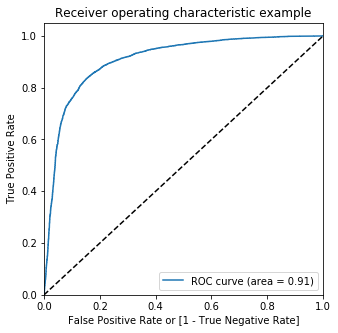

In [136]:
draw_roc(y_train, y_train_prob_final)

### COnfusin Matrix

In [137]:
# write a function to draw confusion matrix

def confusion_plot(cm):
    labels = ['Churn','Not Churn']
    fig = plt.figure(figsize = (12,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels(['']+labels)
    ax.set_yticklabels(['']+labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    print(cm)

    for (x, y), value in np.ndenumerate(cm):
        plt.text(x, y, f"{value:.2f}", va="center", ha="center")
    plt.show()

In [138]:
cm = confusion_matrix(y_train,y_train_pred_final)

[[6761 1499]
 [1152 7108]]


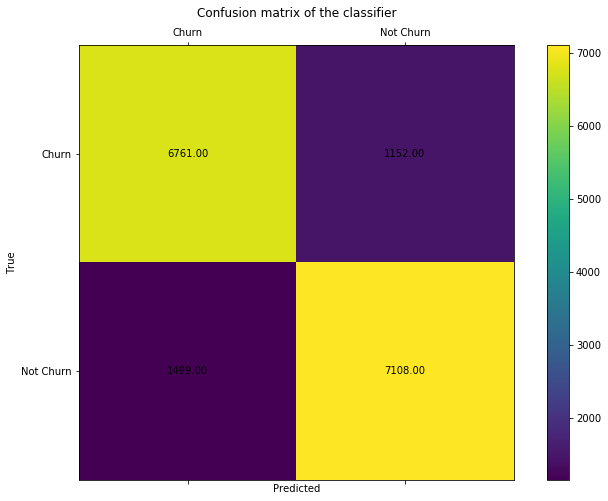

In [139]:
confusion_plot(cm)

In [140]:
cr = classification_report(y_train,y_train_pred_final)
print("classification_report\n",cr)

classification_report
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      8260
           1       0.83      0.86      0.84      8260

    accuracy                           0.84     16520
   macro avg       0.84      0.84      0.84     16520
weighted avg       0.84      0.84      0.84     16520



## Checking the sensitivity

**Optimal cutoff probability is that prob where we get balanced sensitivity and specificity**<br>

**But, considering business requirement, we are more concerned about higher sensitivity by compromising on specificity and accuracy.**<br>

**Which means, even if customers who will not churn are predicted as churn is fine with us. But, we need maximum customers from churn group to be identified as churn.**

In [141]:
#Creating a final dataframe with original churn and predicted probablity
y_train_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_train_prob_final})
y_train_final.head()

,Churn,Churn_Prob
0,0,0.082058
1,0,0.008130
2,1,0.968290
3,0,0.891737
4,0,0.060304


In [142]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_final[i]= y_train_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_final.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.082058,1,0,0,0,0,0,0,0,0,0
1,0,0.008130,1,0,0,0,0,0,0,0,0,0
2,1,0.968290,1,1,1,1,1,1,1,1,1,1
3,0,0.891737,1,1,1,1,1,1,1,1,1,0
4,0,0.060304,1,0,0,0,0,0,0,0,0,0


In [143]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_final.Churn, y_train_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.700121  0.977603  0.422639
0.2   0.2  0.767252  0.955811  0.578692
0.3   0.3  0.804540  0.927845  0.681235
0.4   0.4  0.828632  0.897215  0.760048
0.5   0.5  0.839528  0.860533  0.818523
0.6   0.6  0.838317  0.804116  0.872518
0.7   0.7  0.826271  0.740315  0.912228
0.8   0.8  0.786259  0.627361  0.945157
0.9   0.9  0.626332  0.271671  0.980993


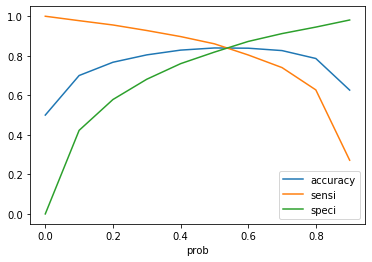

In [144]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**As per above analysis, we can see 0.5 seems to best cut off.**

**But, as per business requirement, sensitivity is more important than accuracy and specificity.**

**Hence, we have cosen 0.3 as cutoff which gives us ~99% sensitivity with not dropping specificity and accuracy much**

In [145]:
y_train_final['predicted'] = y_train_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_train_final.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.082058,1,0,0,0,0,0,0,0,0,0,0
1,0,0.008130,1,0,0,0,0,0,0,0,0,0,0
2,1,0.968290,1,1,1,1,1,1,1,1,1,1,1
3,0,0.891737,1,1,1,1,1,1,1,1,1,0,1
4,0,0.060304,1,0,0,0,0,0,0,0,0,0,0


[[5627 2633]
 [ 596 7664]]


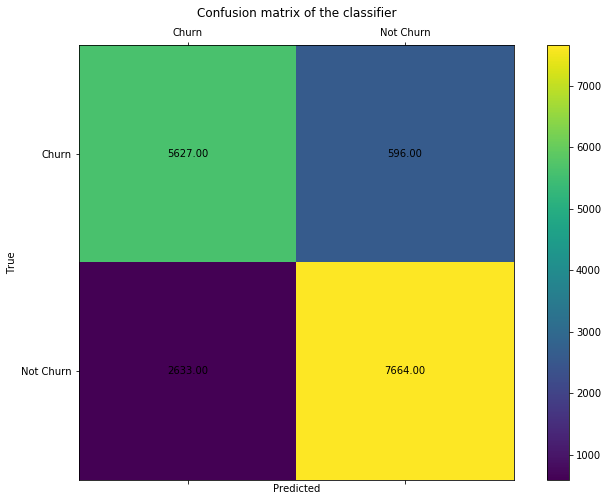

In [146]:
confusion_plot(metrics.confusion_matrix(y_train_final.Churn, y_train_final.predicted ))

In [147]:
print("F1 Score on train data with cut off 0.3 = ",f1_score(y_train_final.Churn, y_train_final.predicted,average = 'weighted'))

F1 Score on train data with cut off 0.3 =  0.8015222675641545


# Prediction on test dataset

In [148]:
y_test_pred_final = model_log.predict(data_test)
y_test_prob_final = model_log.predict_proba(data_test)[:, 1]

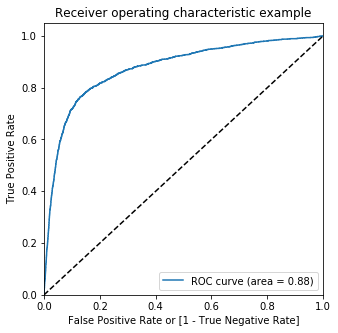

In [149]:
draw_roc(y_test, y_test_prob_final)

In [150]:
#Creating a final dataframe with original churn and predicted probablity
y_test_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_prob_final})
y_test_final.head()

,Churn,Churn_Prob
20296,1,0.680429
8279,1,0.593137
72269,0,0.047435
65602,0,0.262440
42758,1,0.831056


In [151]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob_final, drop_intermediate = False )

In [152]:
cr = classification_report(y_test,y_test_pred_final)
print("classification_report\n",cr)

classification_report
               precision    recall  f1-score   support

           0       0.98      0.83      0.90     19300
           1       0.29      0.80      0.43      1701

    accuracy                           0.82     21001
   macro avg       0.63      0.81      0.66     21001
weighted avg       0.92      0.82      0.86     21001



In [153]:
y_test_final['predicted'] = y_test_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_test_final.head()

,Churn,Churn_Prob,predicted
20296,1,0.680429,1
8279,1,0.593137,1
72269,0,0.047435,0
65602,0,0.262440,0
42758,1,0.831056,1


In [154]:
cm_test = metrics.confusion_matrix(y_test_final.Churn, y_test_final.predicted)

[[13260  6040]
 [  216  1485]]


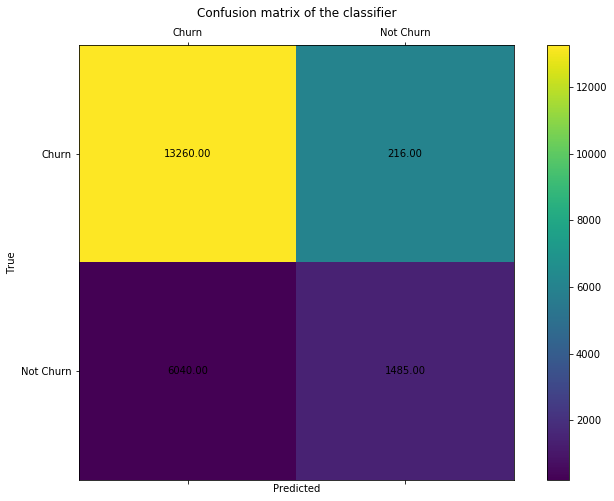

In [155]:
confusion_plot(cm_test)

In [156]:
# Now let's calculate accuracy sensitivity and specificity for test dataset
cutoff_df_test = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
total1=sum(sum(cm_test))
accuracy_test = (cm_test[0,0]+cm_test[1,1])/total1
speci_test = cm_test[0,0]/(cm_test[0,0]+cm_test[0,1])
sensi_test = cm_test[1,1]/(cm_test[1,0]+cm_test[1,1])
cutoff_df_test.loc[0] =[ 0.3 ,accuracy,sensi_test,speci_test]
print(cutoff_df_test)

   prob  accuracy     sensi     speci
0   0.3  0.626332  0.873016  0.687047


In [157]:
print("F1 Score on test data with cut off 0.3 = ",f1_score(y_test_final.Churn, y_test_final.predicted,average = 'weighted'))

F1 Score on test data with cut off 0.3 =  0.7696663129743802


# Conclusion

### Prediction:
**Logistic Regression is best between models for prediction with higher Recall**<br>
### Best Predictor Variables
**1. The variables for month "8" are very import predictor variables. Roaming rates, isd, std are good revenue, this must be kept in check.**<br>
**2. Company can revisit the internet data package schemes because people use internet data more these days since the recharge data is also one of the most important features.**<br>
**2. Since churning is an easy business, company should have regular feedback calls & should have a grievance addresal cell.**